#**Détection de fraudes transactionnelles**


Dans ce TP, on traitera le problème de la détection d'anomalies dans le cadre dans des transactions par des cartes bancaires. 

Aujourd'hui, on se situe dans un contexte où les technologies deviennent de plus en plus accessibles au grand public. Par conséquent, des délits de fraude, liès à ces technologies, augmentent aussi et en particulier les fraudes de cartes bancaires. Il est donc nécessaire de développer des solutions automatiques et adaptés aux siutations de transactions frauduleuses par carte de crédit afin que les clients ne soient pas facturés pour des articles qu'ils n'ont pas achetés.

Le but de ce TP est d'évaluer l'efficacité de l'algorithme de partitionnement/clustering  ( DBSCAN, KMEANS et  CAH )sur la tâche de détection de fraudes. Tout d'abord on procède à l'analyse et la prépation du jeu de données fourni. Le jeu de données contient des transactions effectuées par cartes de crédit en septembre 2013 par des titulaires de cartes européens. Ce jeu de données présente les transactions qui ont eu lieu en deux jours, où nous avons 492 fraudes sur 284 807 transactions. Le jeu de données est fortement déséquilibré, la classe positive (fraudes) représente 0,172% de toutes les transactions. 

Il ne contient que des caractéristiques d'entrée numériques. Pour des raisons de confidentialité, les caractéristiques V1, V2, ... V28 sont issues d'une tranformation mathématique des caractéristiques originales. Les seules caractéristiques 'Temps' et 'Montant' sont les seules à ne pas subir de transformation. La caractéristique "Temps" contient les secondes écoulées entre chaque transaction et la première transaction du jeu de données. La caractéristique 'Montant' est le montant de la transaction. La caractéristique "Classe" est la caractéristique cible et prend la valeur 1 en cas de fraude et 0 sinon.



Question : Selon votre étude, quel est le nombre d'équipe ayant procedé aux opérations de fraudes ?

Charger le jeu de données et afficher les 10 premières lignes. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./jeu_de_donnees.csv")
print(len(df))
df.head(10)

284807


,Temps,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Montant,Classe
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


Afficher l'histogramme des nombres de cas frauduleux et cas non frauduleux.

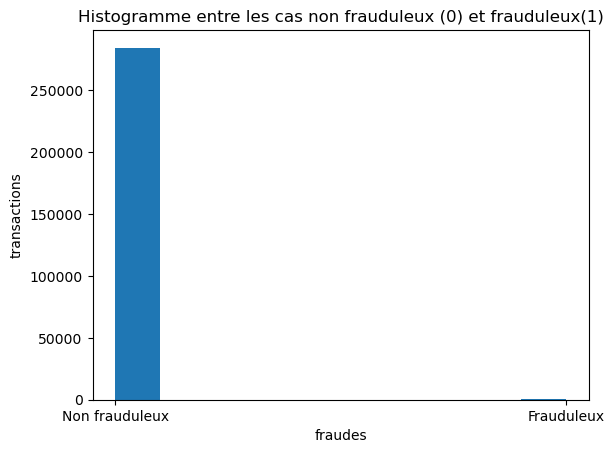

In [2]:
import matplotlib.pyplot as plt

plt.hist(df['Classe'])
plt.title('Histogramme entre les cas non frauduleux (0) et frauduleux(1)')
plt.xlabel('fraudes')
plt.ylabel('transactions')
plt.xticks([0, 1], ['Non frauduleux', 'Frauduleux'])

plt.show()

Réduire le nombre d'observations du jeu de données si la mémoire ram ne supporte le chargement du jeu de données. Afficher à nouveau l'histogramme des noms de cas frauduleux et cas non frauduleux. Assurez dans le jeu de données au moins 0,15% de cas frauduleux pour pouvoir effectuer la suite du tp.

Afficher la taille du jeu de données.

In [3]:
print(len(df))

284807


Supprimer les doublons dans le cas échéant.

In [4]:
df = df.drop_duplicates()
print(len(df))

283726


Vérifier s'il y a présence des valeurs manquantes. Le cas échéant, supprimer les lignes concernées. 
Le projet mené dans le cadre du module de maths,vous aidera à mieux répondre à la problmétique de gestion des valeurs manquantes



In [5]:
# Utiliser isna() pour détecter les valeurs manquantes, puis sum() pour compter
missing_values = df.isna().sum()
# Afficher le nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
Temps      0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
Montant    0
Classe     0
dtype: int64


Procéder à une analyse statistique descriptive de chaque caractéristique (moyenne, variance et autres valeurs statistiques....)

In [6]:
# Calcul de la moyenne de toutes les colonnes
moyenne = df.mean()

print("Moyenne de chaque colonne :")
print(moyenne)

Moyenne de chaque colonne :
Temps      94811.077600
V1             0.005917
V2            -0.004135
V3             0.001613
V4            -0.002966
V5             0.001828
V6            -0.001139
V7             0.001801
V8            -0.000854
V9            -0.001596
V10           -0.001441
V11            0.000202
V12           -0.000715
V13            0.000603
V14            0.000252
V15            0.001043
V16            0.001162
V17            0.000170
V18            0.001515
V19           -0.000264
V20            0.000187
V21           -0.000371
V22           -0.000015
V23            0.000198
V24            0.000214
V25           -0.000232
V26            0.000149
V27            0.001763
V28            0.000547
Montant       88.472687
Classe         0.001667
dtype: float64


In [7]:
# Calcul de la variance de la colonne spécifiée
variance_colonne = df.var()

print("Variance de la colonne : ", variance_colonne)

Variance de la colonne :  Temps      2.254450e+09
V1         3.794806e+00
V2         2.711631e+00
V3         2.276121e+00
V4         1.999916e+00
V5         1.896152e+00
V6         1.774039e+00
V7         1.507159e+00
V8         1.390169e+00
V9         1.200104e+00
V10        1.158653e+00
V11        1.037791e+00
V12        9.893773e-01
V13        9.908802e-01
V14        9.067136e-01
V15        8.370304e-01
V16        7.633453e-01
V17        7.098186e-01
V18        7.012011e-01
V19        6.615847e-01
V20        5.928757e-01
V21        5.240448e-01
V22        5.249734e-01
V23        3.890047e-01
V24        3.667837e-01
V25        2.716706e-01
V26        2.323750e-01
V27        1.566132e-01
V28        1.076015e-01
Montant    6.269988e+04
Classe     1.664328e-03
dtype: float64


Tracer des histogrammes des différentes caractéristiques V1 - V28 pour déterminer lesquelles sont importantes ou discriminantes par rapport à la classe. Deux histogrammes de couleur différente(un pour les cas fraduleux et l'autre des cas normaux) par caractéristique sont attendus dans un même graphe.

283253
473


C:\Users\gaeta\AppData\Local\Temp\ipykernel_760\2343887602.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))  # Ajustez la taille du graphe si nécessaire


<Figure size 800x400 with 0 Axes>

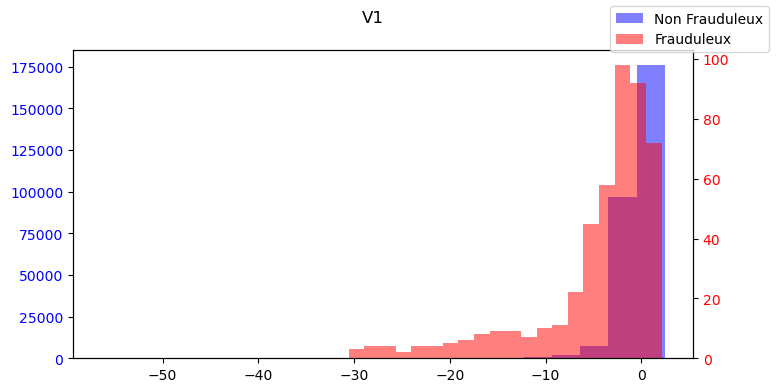

<Figure size 800x400 with 0 Axes>

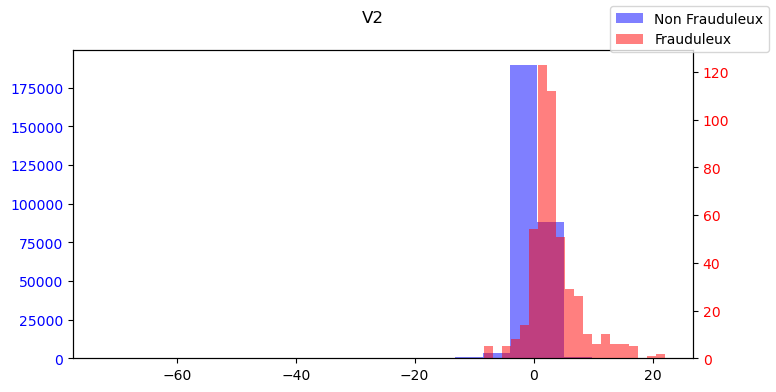

<Figure size 800x400 with 0 Axes>

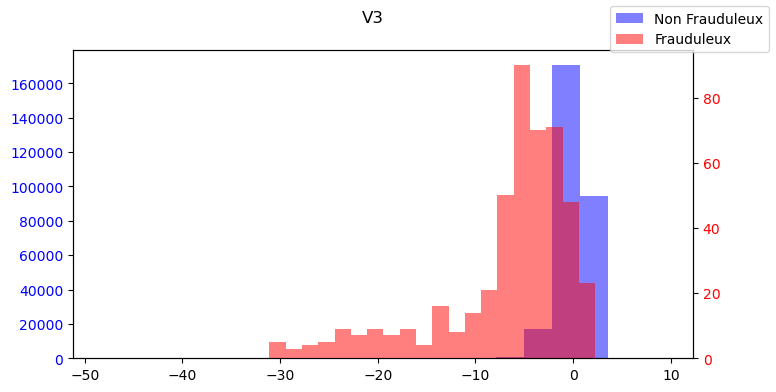

<Figure size 800x400 with 0 Axes>

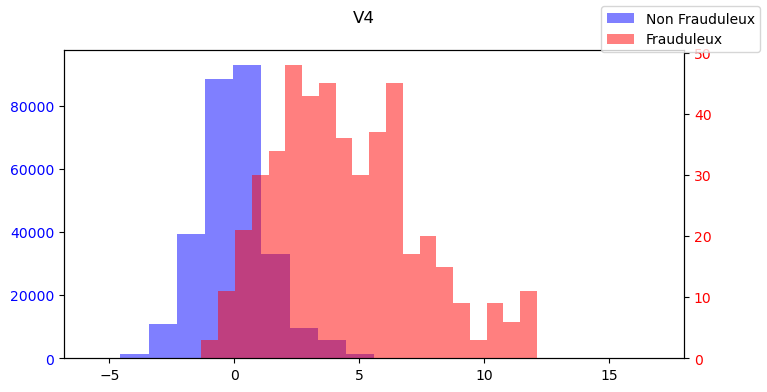

<Figure size 800x400 with 0 Axes>

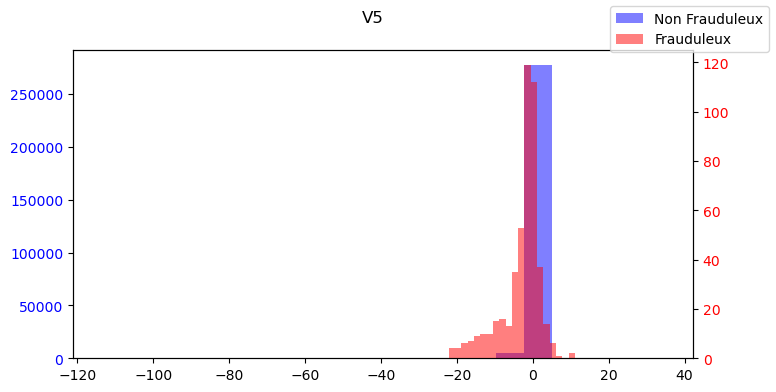

<Figure size 800x400 with 0 Axes>

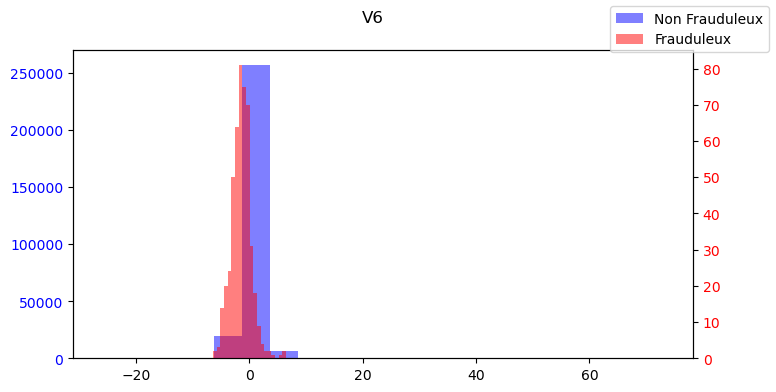

<Figure size 800x400 with 0 Axes>

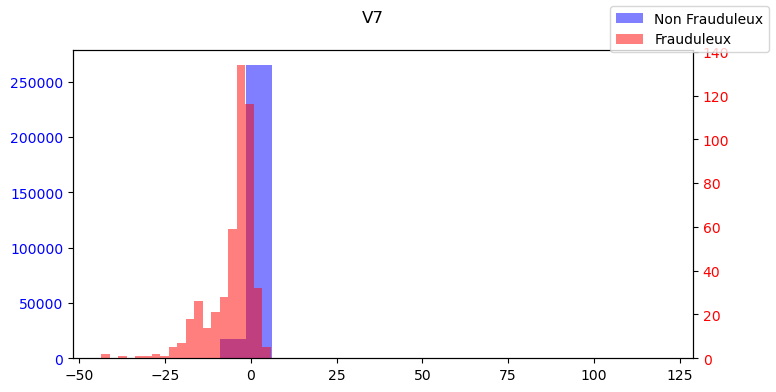

<Figure size 800x400 with 0 Axes>

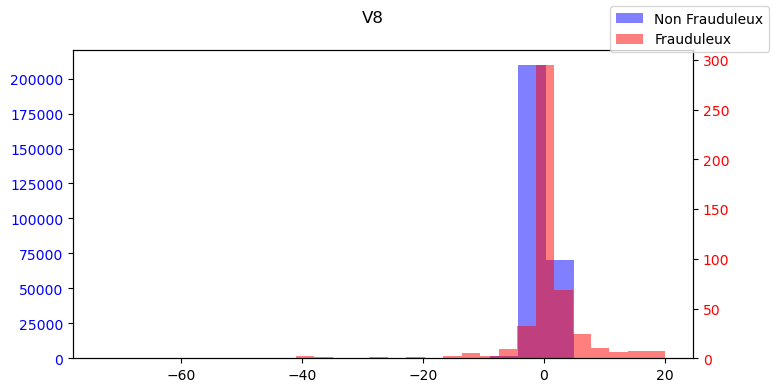

<Figure size 800x400 with 0 Axes>

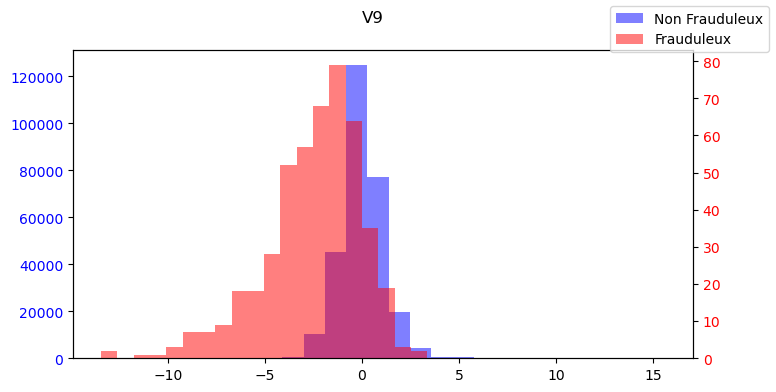

<Figure size 800x400 with 0 Axes>

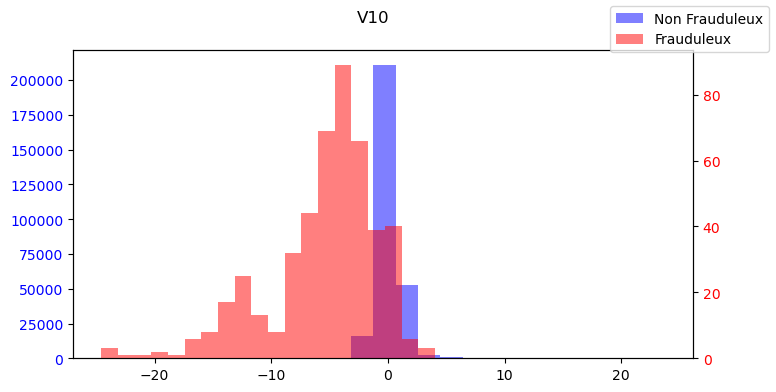

<Figure size 800x400 with 0 Axes>

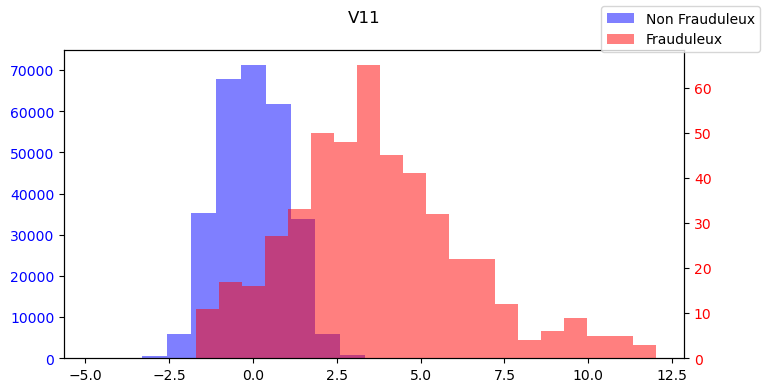

<Figure size 800x400 with 0 Axes>

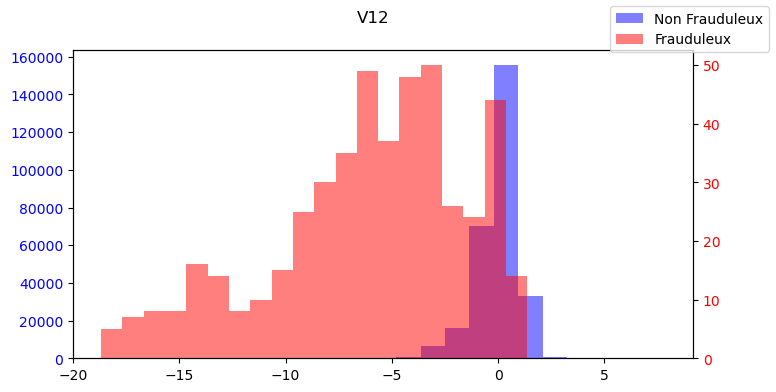

<Figure size 800x400 with 0 Axes>

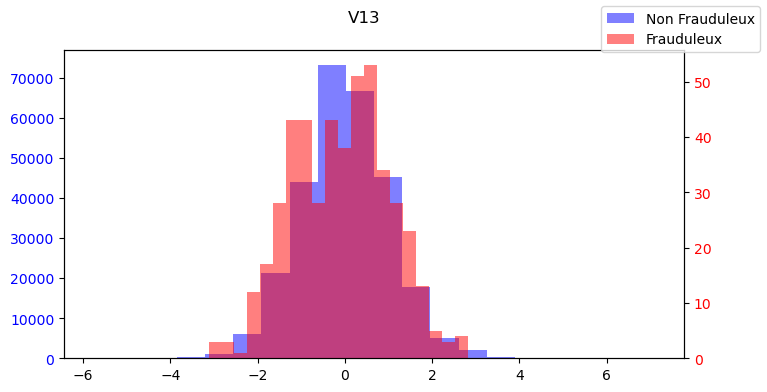

<Figure size 800x400 with 0 Axes>

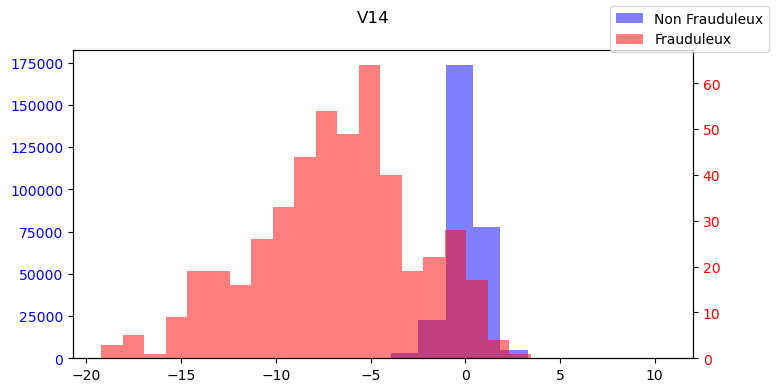

<Figure size 800x400 with 0 Axes>

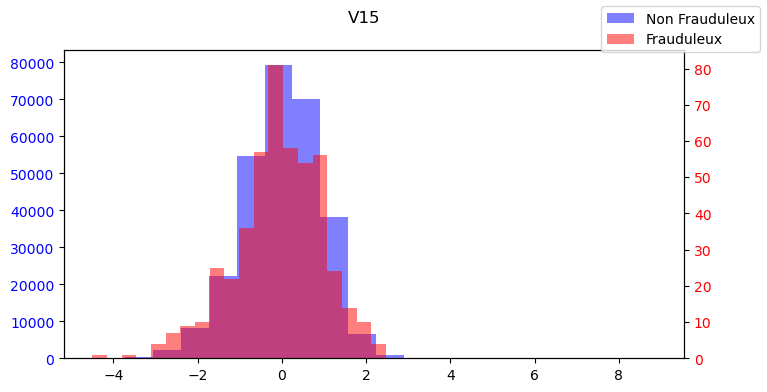

<Figure size 800x400 with 0 Axes>

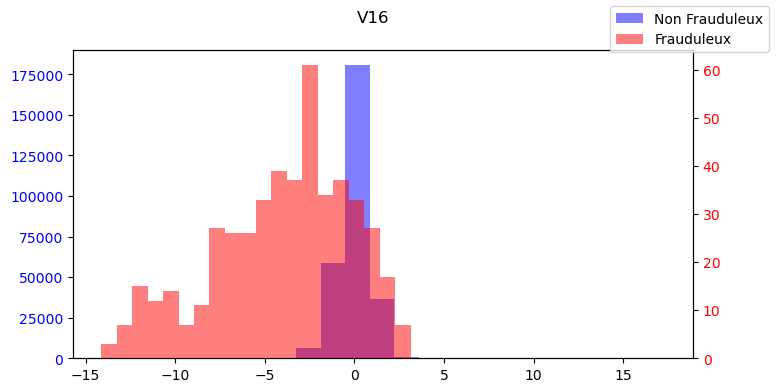

<Figure size 800x400 with 0 Axes>

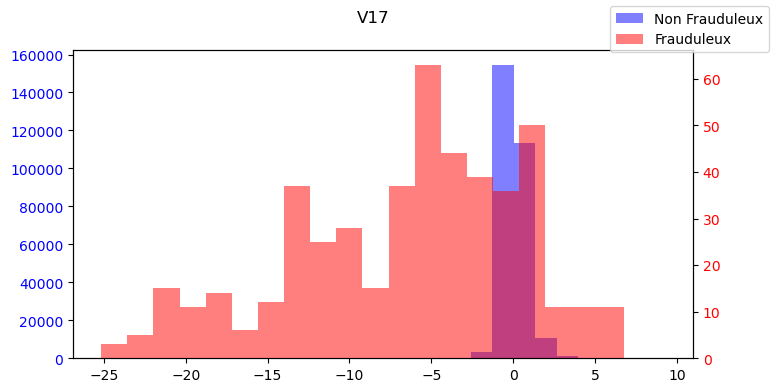

<Figure size 800x400 with 0 Axes>

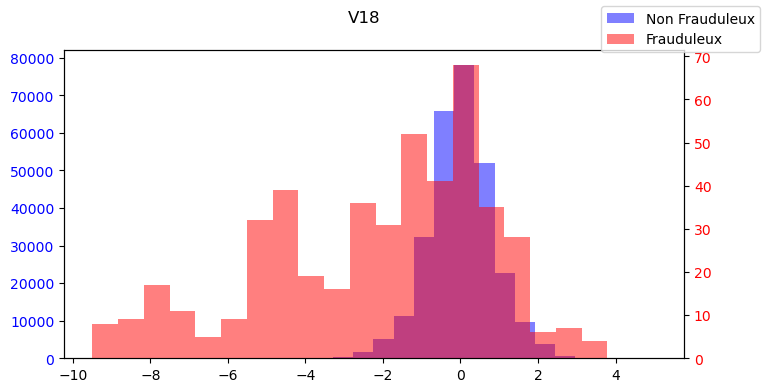

<Figure size 800x400 with 0 Axes>

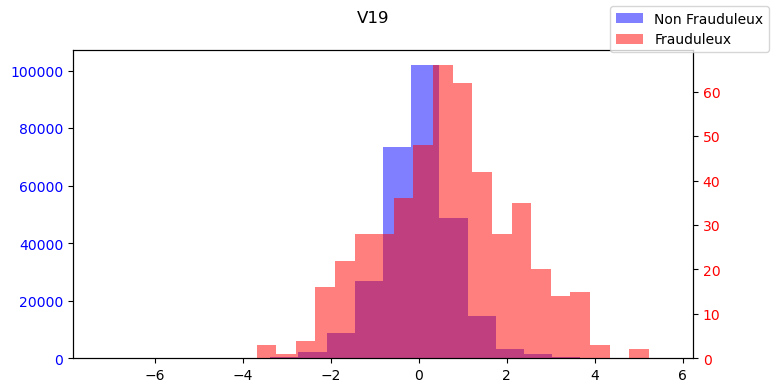

<Figure size 800x400 with 0 Axes>

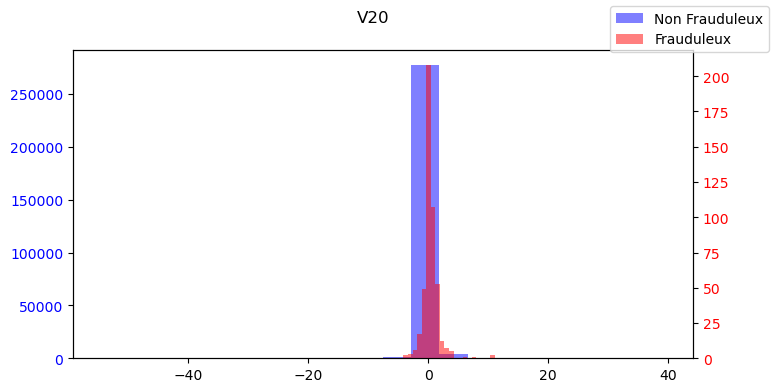

<Figure size 800x400 with 0 Axes>

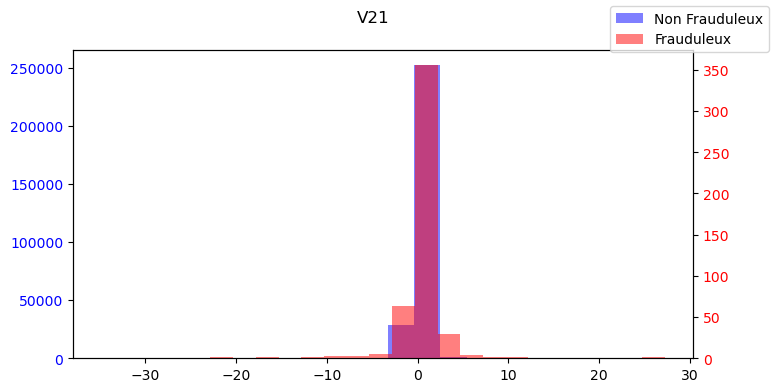

<Figure size 800x400 with 0 Axes>

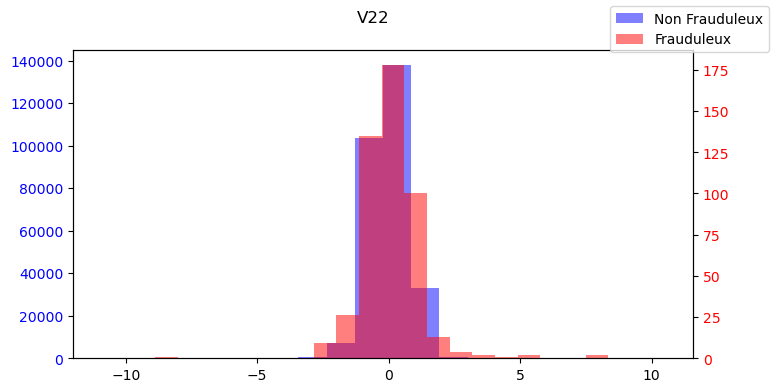

<Figure size 800x400 with 0 Axes>

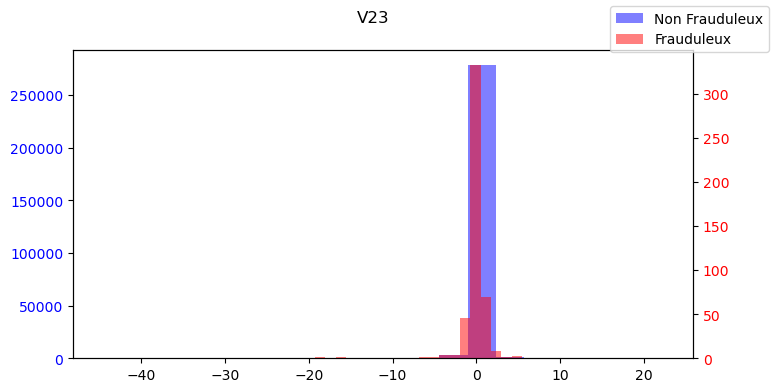

<Figure size 800x400 with 0 Axes>

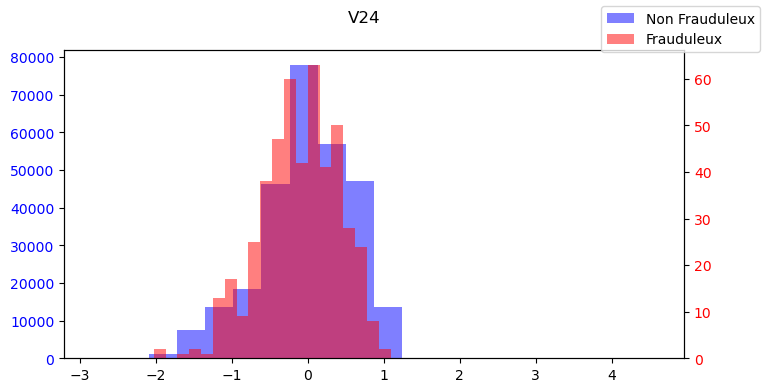

<Figure size 800x400 with 0 Axes>

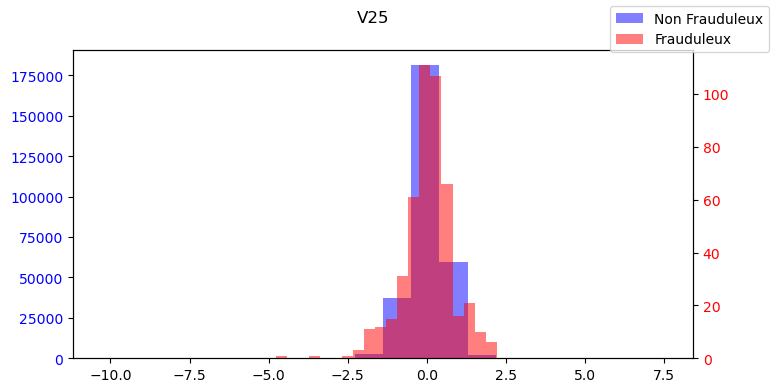

<Figure size 800x400 with 0 Axes>

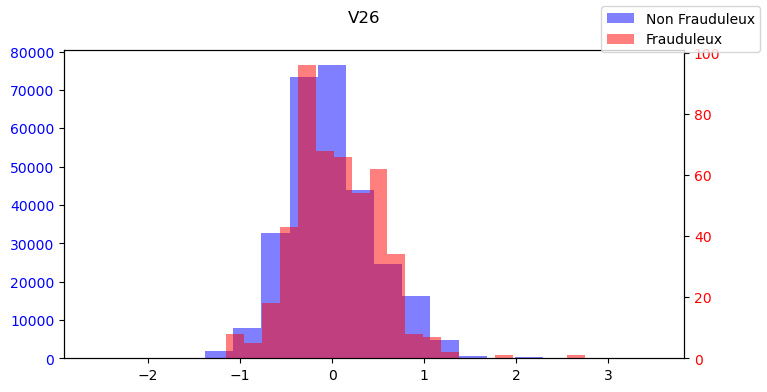

<Figure size 800x400 with 0 Axes>

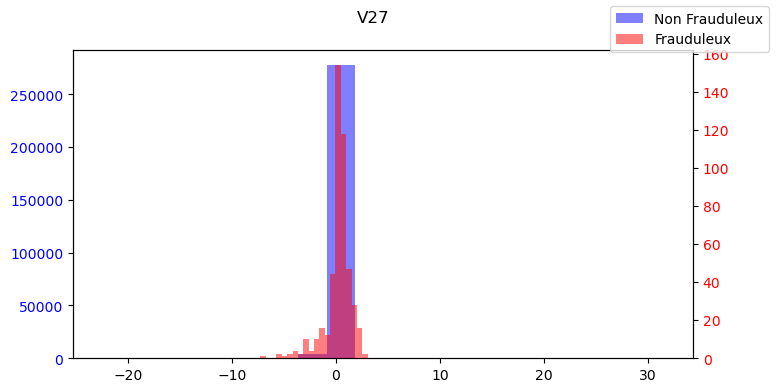

<Figure size 800x400 with 0 Axes>

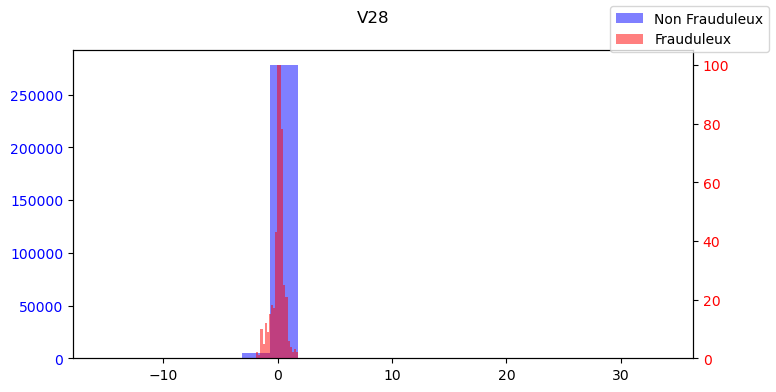

In [8]:
df_non_frauduleux = df[df['Classe'] == 0]
print(len(df_non_frauduleux))
df_frauduleux = df[df['Classe'] == 1]
print(len(df_frauduleux))

for i in range(1, 29):
    column_name = 'V'+str(i)
    
    plt.figure(figsize=(8, 4))  # Ajustez la taille du graphe si nécessaire
    
    # Création de la figure et du premier axe y
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # Tracer l'histogramme pour les données non frauduleuses sur le premier axe y
    ax1.hist(df_non_frauduleux[column_name], bins=20, color='blue', alpha=0.5, label='Non Frauduleux')

    # Création du deuxième axe y
    ax2 = ax1.twinx()

    # Tracer l'histogramme pour les données frauduleuses sur le deuxième axe y
    ax2.hist(df_frauduleux[column_name], bins=20, color='red', alpha=0.5, label='Frauduleux')
    
    # Définir les couleurs des axes y
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Donner un titre au graphique
    fig.suptitle(column_name)

    # Affichage de la légende
    fig.legend(loc='upper right')
    
    

Calculer la corrélation entre les différentes caractéristiques de l'ensemble de données. Une carte thermique des corrélations est attendue.

<Axes: >

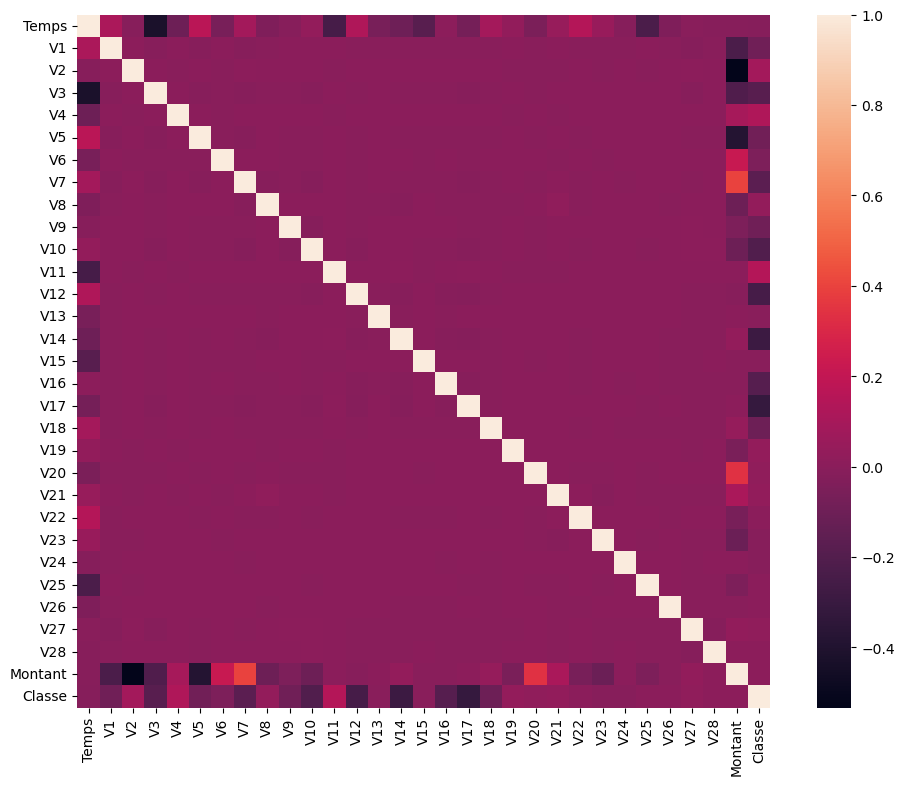

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
 
df_normalise = df.corr()
 
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_normalise, vmax=1, square=True)

Trier les différentes colonnes de l'ensemble de données sur la base de leurs valeurs de corrélation par rapport à la classe afin d'éliminer les caractéristiques moins importantes.

In [10]:
correlations_classe = df.corr()['Classe']
print("Colonnes et valeurs de corrélation avec la classe :")
print(correlations_classe)

colonnes_triees = correlations_classe.sort_values(ascending=True).index

# Afficher les colonnes triées
print("Colonnes triées en fonction de leur corrélation avec la classe :")
print(colonnes_triees)

# Sélectionner les colonnes dans l'ordre trié
df_trie = df[colonnes_triees]

# Afficher le DataFrame avec les colonnes triées
print("DataFrame avec les colonnes triées :")
print(df_trie)

Colonnes et valeurs de corrélation avec la classe :
Temps     -0.012359
V1        -0.094486
V2         0.084624
V3        -0.182322
V4         0.129326
V5        -0.087812
V6        -0.043915
V7        -0.172347
V8         0.033068
V9        -0.094021
V10       -0.206971
V11        0.149067
V12       -0.250711
V13       -0.003897
V14       -0.293375
V15       -0.003300
V16       -0.187186
V17       -0.313498
V18       -0.105340
V19        0.033631
V20        0.021486
V21        0.026357
V22        0.004887
V23       -0.006333
V24       -0.007210
V25        0.003202
V26        0.004265
V27        0.021892
V28        0.009682
Montant    0.005777
Classe     1.000000
Name: Classe, dtype: float64
Colonnes triées en fonction de leur corrélation avec la classe :
Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V18', 'V1', 'V9', 'V5',
       'V6', 'Temps', 'V24', 'V23', 'V13', 'V15', 'V25', 'V26', 'V22',
       'Montant', 'V28', 'V20', 'V27', 'V21', 'V8', 'V19', 'V2', 'V4', 'V11',
      

Lister les noms des colonnes à supprimer. Choisissez par exemple les 13 colonnes les moins corrélées à la classe.


In [11]:
# Sélectionnez les 13 premiers noms de colonnes
noms_colonnes_a_supprimer = df_trie.columns[:13]

print("nom des colonnes a supprimer")
print(noms_colonnes_a_supprimer)

df_clean = df.drop(columns=noms_colonnes_a_supprimer)

print(df_clean)

nom des colonnes a supprimer
Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V18', 'V1', 'V9', 'V5',
       'V6', 'Temps'],
      dtype='object')
               V2        V4        V8       V11       V13       V15       V19  \
0       -0.072781  1.378155  0.098698 -0.551600 -0.991390  1.468177  0.403993   
1        0.266151  0.448154  0.085102  1.612727  0.489095  0.635558 -0.145783   
2       -1.340163  0.379780  0.247676  0.624501  0.717293  2.345865 -2.261857   
3       -0.185226 -0.863291  0.377436 -0.226487  0.507757 -0.631418 -1.232622   
4        0.877737  0.403034 -0.270533 -0.822843  1.345852  0.175121  0.803487   
...           ...       ...       ...       ...       ...       ...       ...   
284802  10.071785 -2.066656  7.305334 -1.593105 -0.689256 -0.924459 -0.682920   
284803  -0.055080 -0.738589  0.294869 -0.150189  1.214756  1.164931 -1.545556   
284804  -0.301254 -0.557828  0.708417  0.411614 -0.183699  1.329284 -0.577252   
284805   0.530483  0.689799  0.679145

Appliquer l'algorithme de [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) avec minPts=4 et eps=1 sur le jeu de données. Note: la colonne "Class" est à enlever car la tâche confiée à DBSCAN est menée en mode non supervisée.

In [12]:
df_clean_without_class = df_clean.drop(columns=['Classe'])

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_clean_without_class)

clustering = DBSCAN(eps=1, min_samples=4).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1822
Estimated number of noise points: 103158


Identifier à partir des résultats fournis par DBSCAN, les observations qui ont été considérés comme du bruit. Nous considérons que ces observations correspondent à des transactions frauduleuses.

In [13]:
# Identifier les observations considérées comme du bruit (transactions frauduleuses)
fraudulent_transactions = df_clean[labels == -1]
print(len(fraudulent_transactions))
print(fraudulent_transactions)

103158
               V2        V4        V8       V11       V13       V15       V19  \
0       -0.072781  1.378155  0.098698 -0.551600 -0.991390  1.468177  0.403993   
2       -1.340163  0.379780  0.247676  0.624501  0.717293  2.345865 -2.261857   
3       -0.185226 -0.863291  0.377436 -0.226487  0.507757 -0.631418 -1.232622   
4        0.877737  0.403034 -0.270533 -0.822843  1.345852  0.175121  0.803487   
7        1.417964 -0.492199 -3.807864 -0.619468  1.757964  0.686133  0.324505   
...           ...       ...       ...       ...       ...       ...       ...   
284799  -0.004235  0.331096  2.080825 -1.264072 -0.243142 -0.766554  0.792135   
284802  10.071785 -2.066656  7.305334 -1.593105 -0.689256 -0.924459 -0.682920   
284803  -0.055080 -0.738589  0.294869 -0.150189  1.214756  1.164931 -1.545556   
284805   0.530483  0.689799  0.679145 -1.933849 -1.042082  1.962563  2.897849   
284806  -0.189733 -0.506271 -0.414650 -1.040458 -0.188093  0.041333 -0.256117   

             V20    

Calculer l'intersection l'ensemble des transactions fraduleuses du jeu de données original (qu'on appelera T) et l'ensemble des transactions fraduleurses détectés par DBSCAN, qu'on appelera D. Diviser la cardinalité de cette intersection par la cardinalité de T. On appelera ce ratio r_score. Plus ce ratio tend vers 1 plus DBSCAN est efficace dans la détection des transactions frauduleuses.

In [14]:
# Identifier l'ensemble des transactions frauduleuses du jeu de données original (T)
transactions_frauduleuses_originales = df_clean[df_clean['Classe'] == 1]

# Identifier l'ensemble des transactions frauduleuses détectées par DBSCAN (D)
transactions_frauduleuses_DBSAN = df_clean.iloc[labels == -1]

# Calculer l'intersection de T et D
intersection = df_clean[(df_clean['Classe'] == 1) & (labels == -1)]

# Diviser la cardinalité de l'intersection par la cardinalité de T pour obtenir r_score
cardinalite_T = len(transactions_frauduleuses_originales)
r_score = len(intersection) / cardinalite_T

print("Le r_score est:", r_score)

Le r_score est: 0.8921775898520085


Relancer DBSCAN avec des valeurs de MinPts et eps au choix. Le ratio r_score a été améliorée par rapport à l'exécution précédente?

In [15]:
clustering = DBSCAN(eps=1, min_samples=5).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Identifier l'ensemble des transactions frauduleuses du jeu de données original (T)
transactions_frauduleuses_originales = df_clean[df_clean['Classe'] == 1]

# Identifier l'ensemble des transactions frauduleuses détectées par DBSCAN (D)
transactions_frauduleuses_DBSAN = df_clean.iloc[labels == -1]

# Calculer l'intersection de T et D
intersection = df_clean[(df_clean['Classe'] == 1) & (labels == -1)]

# Diviser la cardinalité de l'intersection par la cardinalité de T pour obtenir r_score
cardinalite_T = len(transactions_frauduleuses_originales)
r_score = len(intersection) / cardinalite_T

print("Le r_score est:", r_score)

Estimated number of clusters: 1171
Estimated number of noise points: 109623
Le r_score est: 0.9175475687103594


Dans la suite nous chercherons à identifier les valeurs optimales de minPts et eps. Dans cette recherche nous considérons que les kième plus proches voisins sont à peu près à la même distance. Les points bruits ont leur kième plus proche voisin à une distance plus grande. 

On fixe tout d'abord la valeur de k au choix (par exemple k=4) et on identifie selon l'approche ci-dessous la valeur de eps:
- Calculer la distance entre chaque point et son kième voisin;
- Trier les indices des points selon les distances calculées;
- Tracez la courbe des distances en fonction des points triés;
- Appliquer la méthode elbow sur cette courbre, autrement dit trouvez la distance d où il y a un "coude" dans la courbe. On considère alors eps = d et minPts = k.

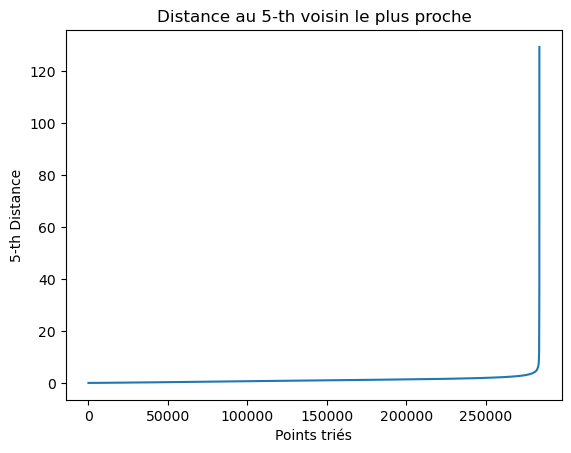

In [17]:
from sklearn.neighbors import NearestNeighbors

# Définir le nombre de voisins k
k = 5

# Calculer les k plus proches voisins pour chaque point
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Calculer la distance au dernier voisin pour chaque point
kth_distances = distances[:, -1]

# Trier les indices des points selon les distances calculées de manière croissantes
sorted_kth_distances = sorted(kth_distances)

# Tracer la courbe des distances en fonction des points triés
plt.plot(range(len(X)), sorted_kth_distances)
plt.xlabel('Points triés')
plt.ylabel('{}-th Distance'.format(k))
plt.title('Distance au {}-th voisin le plus proche'.format(k))
plt.show()

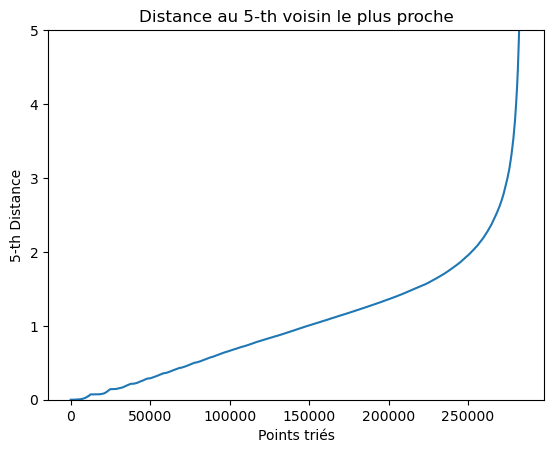

In [18]:
# Appliquer la méthode du coude pour trouver eps
# Nous pouvons utiliser par exemple le critère du premier coude significatif
# qui peut être repéré visuellement sur le graphique des distances triées

# Tracer la courbe des distances en fonction des points triés zoomés sur le coude
plt.plot(range(len(X)), sorted_kth_distances)
plt.xlabel('Points triés')
plt.ylim(0,5)
plt.ylabel('{}-th Distance'.format(k))
plt.title('Distance au {}-th voisin le plus proche'.format(k))
plt.show()

Réexécuter DBSCAN avec les nouvelles valeurs de eps et minPts. L'efficacité de DBSCAN a été améliorée?  

In [19]:
clustering = DBSCAN(eps=2, min_samples=5).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Identifier l'ensemble des transactions frauduleuses du jeu de données original (T)
transactions_frauduleuses_originales = df_clean[df_clean['Classe'] == 1]

# Identifier l'ensemble des transactions frauduleuses détectées par DBSCAN (D)
transactions_frauduleuses_DBSAN = df_clean.iloc[labels == -1]

# Calculer l'intersection de T et D
intersection = df_clean[(df_clean['Classe'] == 1) & (labels == -1)]

# Diviser la cardinalité de l'intersection par la cardinalité de T pour obtenir r_score
cardinalite_T = len(transactions_frauduleuses_originales)
r_score = len(intersection) / cardinalite_T

print("Le r_score est:", r_score)

Estimated number of clusters: 187
Estimated number of noise points: 21291
Le r_score est: 0.733615221987315


In [20]:
# Résultat de epsilon aléatoire et sample aléatoire=
# DBSCAN(eps=1, min_samples=5) = score: 0.9175475687103594, clusters: 1171, noise: 103158

# Résultat de epsilon décidé par le coude de la methode elbow et sample aléatoire=
# DBSCAN(eps=2, min_samples=5) = score: 0.733615221987315,  clusters:  187, noise:  21291

#le resultat n'a pas été amélioré

Déterminer minPts et eps(selon l'approche elbow présentée ci-dessus) qui aboutit au meilleur score r_score que DBSCAN pourrait atteindre. Note: vous pourriez lister une série de valeurs possibles de minPts puis déterminer la valeur de l'eps associée selon elbow, et pour paire de valeurs de minPts et eps lancer DBSCAN.  

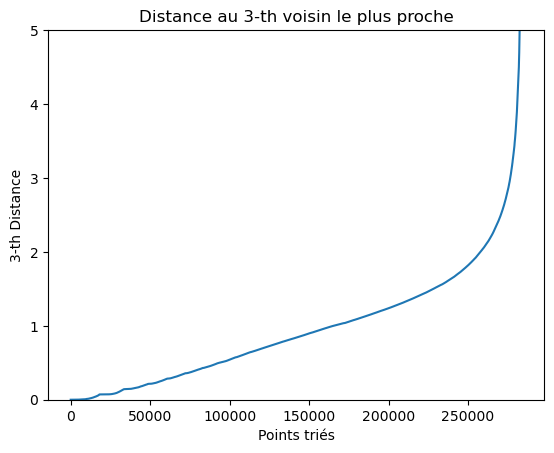

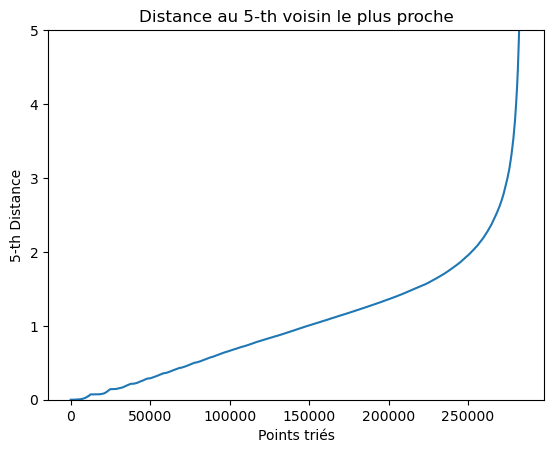

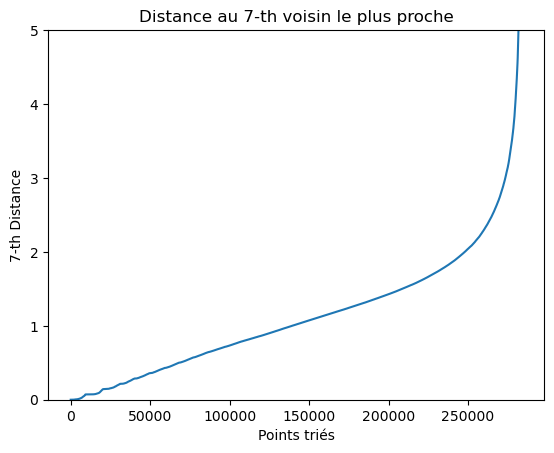

In [21]:
from sklearn.neighbors import NearestNeighbors

# Définir le nombre de voisins k
for i in [3,5,7]:
    k = i

    # Calculer les k plus proches voisins pour chaque point
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # Calculer la distance au dernier voisin pour chaque point
    kth_distances = distances[:, -1]

    # Trier les indices des points selon les distances calculées de manière croissantes
    sorted_kth_distances = sorted(kth_distances)

    # Tracer la courbe des distances en fonction des points triés
    plt.plot(range(len(X)), sorted_kth_distances)
    plt.xlabel('Points triés')
    plt.ylabel('{}-th Distance'.format(k))
    plt.ylim(0,5)
    plt.title('Distance au {}-th voisin le plus proche'.format(k))
    plt.show()

In [22]:
# Résultat de epsilon décidé par le coude de la methode elbow et plus proche voisin a 3 =
# résultat de epsilon = 2
# Résultat de epsilon décidé par le coude de la methode elbow et plus proche voisin a 5 =
# résultat de epsilon = 2
# Résultat de epsilon décidé par le coude de la methode elbow et plus proche voisin a 7 =
# résultat de epsilon = 2

In [187]:
clustering = DBSCAN(eps=2, min_samples=3).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Identifier l'ensemble des transactions frauduleuses du jeu de données original (T)
transactions_frauduleuses_originales = df_clean[df_clean['Classe'] == 1]

# Identifier l'ensemble des transactions frauduleuses détectées par DBSCAN (D)
transactions_frauduleuses_DBSAN = df_clean.iloc[labels == -1]

# Calculer l'intersection de T et D
intersection = df_clean[(df_clean['Classe'] == 1) & (labels == -1)]

# Diviser la cardinalité de l'intersection par la cardinalité de T pour obtenir r_score
cardinalite_T = len(transactions_frauduleuses_originales)
r_score = len(intersection) / cardinalite_T

print("Le r_score de est:", r_score)

Estimated number of clusters: 655
Estimated number of noise points: 18309
Le r_score de est: 0.6067653276955602


In [178]:
clustering = DBSCAN(eps=2, min_samples=5).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Identifier l'ensemble des transactions frauduleuses du jeu de données original (T)
transactions_frauduleuses_originales = df_clean[df_clean['Classe'] == 1]

# Identifier l'ensemble des transactions frauduleuses détectées par DBSCAN (D)
transactions_frauduleuses_DBSAN = df_clean.iloc[labels == -1]

# Calculer l'intersection de T et D
intersection = df_clean[(df_clean['Classe'] == 1) & (labels == -1)]

# Diviser la cardinalité de l'intersection par la cardinalité de T pour obtenir r_score
cardinalite_T = len(transactions_frauduleuses_originales)
r_score = len(intersection) / cardinalite_T

print("Le r_score est:", r_score)

Estimated number of clusters: 187
Estimated number of noise points: 21291
Le r_score est: 0.733615221987315


In [179]:
clustering = DBSCAN(eps=2, min_samples=7).fit(X)
labels = clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Identifier l'ensemble des transactions frauduleuses du jeu de données original (T)
transactions_frauduleuses_originales = df_clean[df_clean['Classe'] == 1]

# Identifier l'ensemble des transactions frauduleuses détectées par DBSCAN (D)
transactions_frauduleuses_DBSAN = df_clean.iloc[labels == -1]

# Calculer l'intersection de T et D
intersection = df_clean[(df_clean['Classe'] == 1) & (labels == -1)]

# Diviser la cardinalité de l'intersection par la cardinalité de T pour obtenir r_score
cardinalite_T = len(transactions_frauduleuses_originales)
r_score = len(intersection) / cardinalite_T

print("Le r_score est:", r_score)

Estimated number of clusters: 90
Estimated number of noise points: 23085
Le r_score est: 0.7610993657505285


In [ ]:
# Résultat de epsilon décidé par le coude de la methode elbow (a valeur 2) et plus proche voisin a 3 =
# DBSCAN(eps=2, min_samples=3) = score: 0.6067653276955602, clusters: 655, noise: 18309
# Résultat de epsilon décidé par le coude de la methode elbow (a valeur 2) et plus proche voisin a 5 =
# DBSCAN(eps=2, min_samples=5) = score: 0.733615221987315, clusters: 187, noise: 21291
# Résultat de epsilon décidé par le coude de la methode elbow (a valeur 2) et plus proche voisin a 7 =
# DBSCAN(eps=2, min_samples=7) = score: 0.7610993657505285, clusters: 90, noise: 23085

Dans l'optique d'améliorer la valeur r_score, nous cherchons à modifier notre jeu de données. On explorera deux possibilités:
- Supprimer davantage de colonnes les moins corrélées à la classe;
- Remettre certaines colonnes, parmi les colonnées précedement supprimées, dans le jeu de données.

Deux jeux de données seront constituées.

In [23]:
# Sélectionnez les 15 premiers noms de colonnes (au lieu de 13 colonnes; 'V24' et 'V23' sont supprimés en +)
more_noms_colonnes_a_supprimer = df_trie.columns[:15]
print("more nom des colonnes a supprimer")
print(more_noms_colonnes_a_supprimer)

df_delete_more = df.drop(columns=more_noms_colonnes_a_supprimer)

df_less_columns = df_delete_more.drop(columns=['Classe'])
X_less = StandardScaler().fit_transform(df_less_columns)

# Sélectionnez les 11 premiers noms de colonnes (au lieu de 13 colonnes;  'V6' et 'Temps' sont conservés en +)
less_noms_colonnes_a_supprimer = df_trie.columns[:11]
print("less nom des colonnes a supprimer")
print(less_noms_colonnes_a_supprimer)

df_delete_less = df.drop(columns=less_noms_colonnes_a_supprimer)

df_more_columns = df_delete_less.drop(columns=['Classe'])
X_more = StandardScaler().fit_transform(df_more_columns)

more nom des colonnes a supprimer
Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V18', 'V1', 'V9', 'V5',
       'V6', 'Temps', 'V24', 'V23'],
      dtype='object')
less nom des colonnes a supprimer
Index(['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V18', 'V1', 'V9', 'V5'], dtype='object')


Pour chacun des jeux de données, appliquer l'approche précédente pour identifier une liste de valeurs optimales de minPts et eps.

In [24]:
# POUR LE JEU DE DONNEES AVEC PLUS DE COLONNES SUPPRIMER (X_MORE):

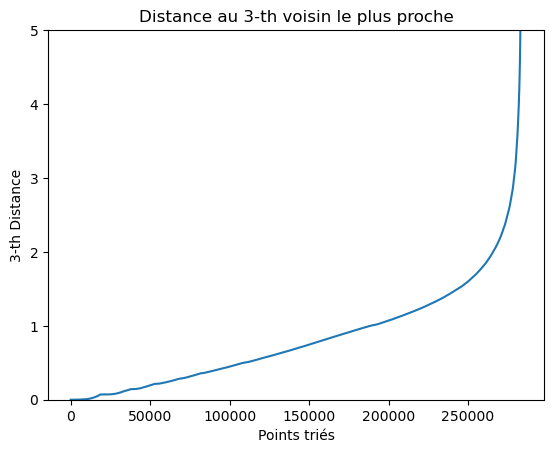

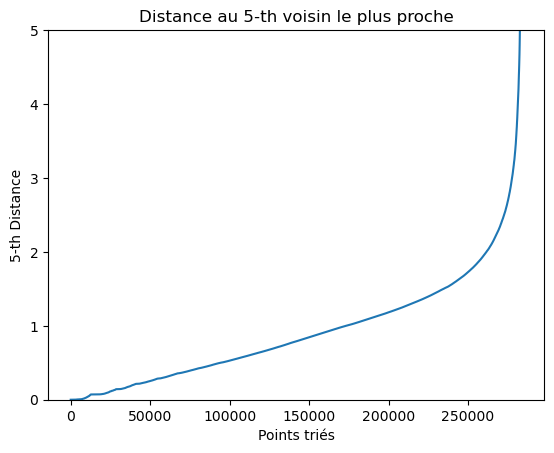

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Définir le nombre de voisins k
for i in [3,5,7]:
    k = i

    # Calculer les k plus proches voisins pour chaque point
    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_less)
    distances, indices = nbrs.kneighbors(X_less)

    # Calculer la distance au dernier voisin pour chaque point
    kth_distances = distances[:, -1]

    # Trier les indices des points selon les distances calculées de manière croissantes
    sorted_kth_distances = sorted(kth_distances)

    # Tracer la courbe des distances en fonction des points triés
    plt.plot(range(len(X_less)), sorted_kth_distances)
    plt.xlabel('Points triés')
    plt.ylabel('{}-th Distance'.format(k))
    plt.ylim(0,5)
    plt.title('Distance au {}-th voisin le plus proche'.format(k))
    plt.show()

Exécuter DBSCAN sur chaque paire de valeurs optimales de minPts et eps. Qu'en est-il du score r_score?

Nous allons maintenant mettre de coté DBscan pour utiliser Kmeans.


1) Trouver le meilleur K en proposant deux méthodes pour le determiner.
2) comparer l'initialisation des k ( random et la méthode intélligente activée par défaut )
3) proposer un clustering pour répondre à la problématique 
4) comparer et analyser le score obtenu avec celui de dbscan
5)lequel des deux algorithmes et preférable dans le cadre de ce TP.


***********************************************************************************************************

6) proposer votre propre implémentation de l'algorithme de Kmeans
7) proposer un modèle d'apprentissage avec votre version et comparer le score avec les deux derniers scores